2核心：求解未知参数，使得测量值与真实值之差（误差、残差）的平方和达到最小（损失函数达到最小）。

3目标函数： 
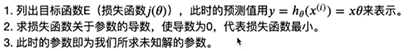
4目标：求最小值

5解法：
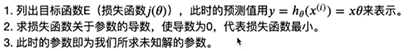

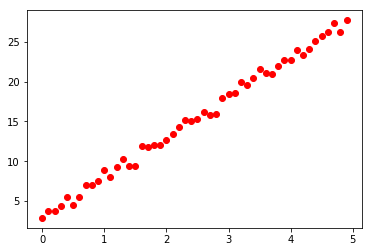

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#在直线y = 5x + 3附近生成随机点
X = np.arange(0,5,0.1) #生成0到5，以0.1为刻度
Z = [5 * x + 3 for x in X]
Y = [np.random.normal(z,0.5) for z in Z]

plt.plot(X,Y,'ro')
plt.show()

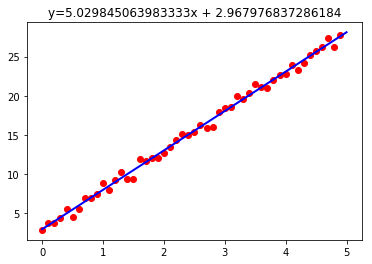

In [4]:
#这个方框内的是整段代码最重要的
from scipy.optimize import leastsq

#需要拟合的函数func:指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b
#误差函数
def error(p,x,y):
    return func(p,x)-y

p0=[1,20]
Para = leastsq(error,p0,args=(X,Y))
k,b=Para[0]

_X=[0,5]
_Y=[b+k*x for x in _X]

plt.plot(X,Y,'ro',_X,_Y,'b',linewidth=2)
plt.title("y={}x + {}".format(k,b))
plt.show()


In [6]:
#线性回归解正则方程

def linear_regression(x,y):
    N = len(x)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x**2)
    sumxy = sum(x*y)
    
    A = np.mat([[N,sumx],[sumx,sumx2]])
    b = np.array([sumy,sumxy])
    
    return np.linalg.solve(A,b)
a0,a1 = linear_regression(X,Y)
    

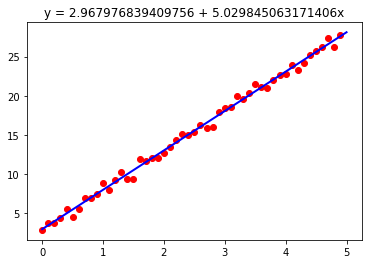

In [8]:
#生成拟合直线的绘制点
_X = [0,5]
_Y =[a0 + a1 * x for x in _X]

plt.plot(X,Y,'ro',_X,_Y,'b',linewidth=2)
plt.title("y = {} + {}x".format(a0,a1))
plt.show()

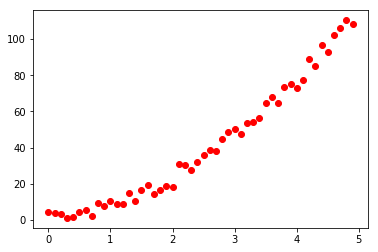

In [9]:
#求解曲线
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0,5,0.1)
Z = [2+3*x + 4*x**2 for x in X]
Y = np.array([np.random.normal(z,3) for z in Z])

plt.plot(X,Y,'ro')
plt.show()

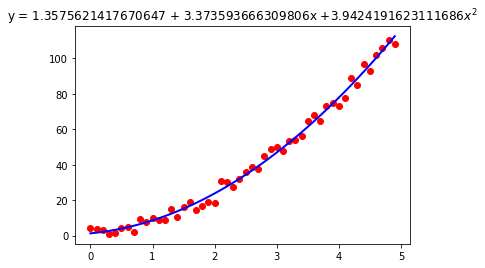

In [12]:
from scipy.optimize import leastsq

#需要拟合的函数func : 指定函数的形状

def func(p,x):
    m,n,o = p
    return m + n*x + o*x**2
    
#偏差函数:x,y都是列表：这里的x，y跟上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

p0 = [0,5,10]
Para = leastsq(error,p0,args = (X,Y))
m,n,o=Para[0]

_X = np.arange(0,5,0.1)
_Y = np.array([m + n*x + o*x**2 for x in _X])

plt.plot(X,Y,'ro',_X,_Y,'b',linewidth=2)
plt.title("y = {} + {}x +{}$x^2$".format(m,n,o))
plt.show()

In [14]:
#生成系数矩阵A
def gen_coefficient_matrix(X,Y):
    N = len(X)
    m = 3
    A = []
    #计算每一个方程的系数
    for i in range(m):
        a = []
    #计算当前方程中的每一个i系数
        for j in range(m):
            a.append(sum(X ** (i + j)))
        A.append(a)
    return A

#计算方差组的右端向量b
def gen_right_vector(X,Y):
    N = len(X)
    m = 3
    b = []
    for i in range(m):
        b.append((sum(X**i*Y)))
    return b

A = gen_coefficient_matrix(X,Y)
b = gen_right_vector(X,Y)

a0,a1,a2 = np.linalg.solve(A,b)
print(a0,a1,a2)


1.3575623362871674 3.373593535043044 3.942419182543964


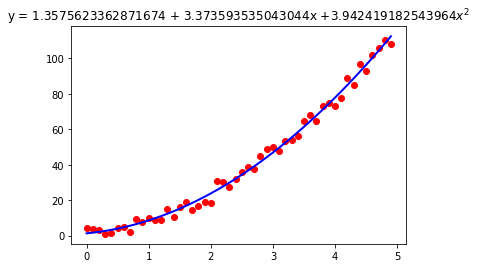

In [16]:
#生成拟合曲线的绘制点
_X2 = np.arange(0,5,0.1)
_Y2 = np.array([a0 + a1*x + a2*x**2 for x in _X2])

plt.plot(X,Y,'ro',_X2,_Y2,'b',linewidth=2)
plt.title("y = {} + {}x +{}$x^2$".format(a0,a1,a2))
plt.show()